# 🧩 Day-3: Handling Missing Data
---
## 🌟 What is Missing Data?

**Missing Data** refers to the absence of values in one or more columns of a dataset.  
It is one of the most common problems in real-world datasets.

Example:
| Name   | Age | Salary  |
|-------|:---:|:------:|
| Ravi  | 24  | 25000  |
| Rani  | NaN | 30000  |
| Rahul | 22  | NaN    |

Here, **NaN** means data is missing.

---

## 🔥 Why Handle Missing Data?

Ignoring missing data may lead to:
- **Incorrect Analysis**
- **Wrong Model Predictions**
- **Loss of Valuable Data**

---

In [ ]:
#import all necessary libraries 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#to see available data set  on seaborn 
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
#load "planets" data set
df = sns.load_dataset('planets')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None


IDENTIFYING MISSING VALUES


In [ ]:
#missing values
print(df.isnull().sum())

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64


In [ ]:
#length of the data set
print(len(df))

1035


In [8]:
#percentage of missing values
print((df.isnull().sum()/len(df))*100)

method             0.000000
number             0.000000
orbital_period     4.154589
mass              50.434783
distance          21.932367
year               0.000000
dtype: float64


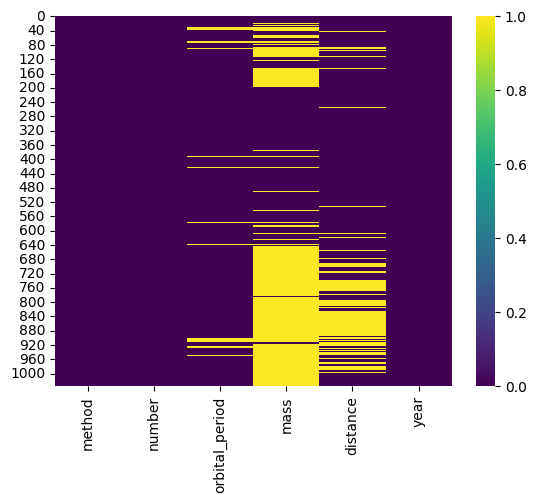

In [10]:
#visualize
sns.heatmap(df.isnull(),cmap='viridis')
plt.show()

HANDLING MISSING DATA

In [ ]:
#dropiing the rows which had null values from the data set
print(df.dropna())
"use when missing values are very few"

              method  number  orbital_period    mass  distance  year
0    Radial Velocity       1       269.30000   7.100     77.40  2006
1    Radial Velocity       1       874.77400   2.210     56.95  2008
2    Radial Velocity       1       763.00000   2.600     19.84  2011
3    Radial Velocity       1       326.03000  19.400    110.62  2007
4    Radial Velocity       1       516.22000  10.500    119.47  2009
..               ...     ...             ...     ...       ...   ...
640  Radial Velocity       1       111.70000   2.100     14.90  2009
641  Radial Velocity       1         5.05050   1.068     44.46  2013
642  Radial Velocity       1       311.28800   1.940     17.24  1999
649          Transit       1         2.70339   1.470    178.00  2013
784  Radial Velocity       3       580.00000   0.947    135.00  2012

[498 rows x 6 columns]


In [ ]:
"if particular column had more than 50% null values then drop that entire column"
#dropping "mass" column
print(df.dropna(subset=['mass']))

              method  number  orbital_period    mass  distance  year
0    Radial Velocity       1         269.300   7.100     77.40  2006
1    Radial Velocity       1         874.774   2.210     56.95  2008
2    Radial Velocity       1         763.000   2.600     19.84  2011
3    Radial Velocity       1         326.030  19.400    110.62  2007
4    Radial Velocity       1         516.220  10.500    119.47  2009
..               ...     ...             ...     ...       ...   ...
784  Radial Velocity       3         580.000   0.947    135.00  2012
913  Radial Velocity       1         677.800  19.800       NaN  2007
914  Radial Velocity       1           6.958   0.340       NaN  2014
915  Radial Velocity       1           5.118   0.400       NaN  2014
916  Radial Velocity       1         121.710   1.540       NaN  2014

[513 rows x 6 columns]


FILLING MISSING VALUES

In [ ]:
#to fill missing values with specific value, we use this:
print(df.fillna(0))

               method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507   0.00    172.00  2006
1031          Transit       1        2.615864   0.00    148.00  2007
1032          Transit       1        3.191524   0.00    174.00  2007
1033          Transit       1        4.125083   0.00    293.00  2008
1034          Transit       1        4.187757   0.00    260.00  2008

[1035 rows x 6 columns]


In [ ]:
#forward fill
print(df.fillna(method='ffill'))

               method  number  orbital_period       mass  distance  year  \
0     Radial Velocity       1      269.300000   7.100000     77.40  2006   
1     Radial Velocity       1      874.774000   2.210000     56.95  2008   
2     Radial Velocity       1      763.000000   2.600000     19.84  2011   
3     Radial Velocity       1      326.030000  19.400000    110.62  2007   
4     Radial Velocity       1      516.220000  10.500000    119.47  2009   
...               ...     ...             ...        ...       ...   ...   
1030          Transit       1        3.941507   2.638161    172.00  2006   
1031          Transit       1        2.615864   2.638161    148.00  2007   
1032          Transit       1        3.191524   2.638161    174.00  2007   
1033          Transit       1        4.125083   2.638161    293.00  2008   
1034          Transit       1        4.187757   2.638161    260.00  2008   

           mean  
0      7.100000  
1      2.210000  
2      2.600000  
3     19.400000

C:\Users\sudha\AppData\Local\Temp\ipykernel_17380\902312866.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method='ffill'))


In [ ]:
#backward fill
print(df.fillna(method='bfill'))

               method  number  orbital_period       mass  distance  year  \
0     Radial Velocity       1      269.300000   7.100000     77.40  2006   
1     Radial Velocity       1      874.774000   2.210000     56.95  2008   
2     Radial Velocity       1      763.000000   2.600000     19.84  2011   
3     Radial Velocity       1      326.030000  19.400000    110.62  2007   
4     Radial Velocity       1      516.220000  10.500000    119.47  2009   
...               ...     ...             ...        ...       ...   ...   
1030          Transit       1        3.941507   2.638161    172.00  2006   
1031          Transit       1        2.615864   2.638161    148.00  2007   
1032          Transit       1        3.191524   2.638161    174.00  2007   
1033          Transit       1        4.125083   2.638161    293.00  2008   
1034          Transit       1        4.187757   2.638161    260.00  2008   

           mean  
0      7.100000  
1      2.210000  
2      2.600000  
3     19.400000

C:\Users\sudha\AppData\Local\Temp\ipykernel_17380\3172350694.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  print(df.fillna(method='bfill'))
